In [1]:
#!pip install lime

# Local Interpretable Model-agnostic Explanations

### Imports and dataset loading

In [2]:
import numpy as np
import pandas as pd 
data = pd.read_csv('bug_pred.csv')
data.head()

line count of code  cyclomatic complexity  essential complexity  \
0                 1.1                    1.4                   1.4   
1                 1.0                    1.0                   1.0   
2                24.0                    5.0                   1.0   
3                20.0                    4.0                   4.0   
4                24.0                    6.0                   6.0   

   design complexity  total operators + operands  volume  program length  \
0                1.4                         1.3    1.30            1.30   
1                1.0                         1.0    1.00            1.00   
2                3.0                        63.0  309.13            0.11   
3                2.0                        47.0  215.49            0.06   
4                2.0                        72.0  346.13            0.06   

   difficulty  intelligence   effort  ...  line count  \
0        1.30          1.30     1.30  ...           2   
1        1.00          1.00     1.00  ...           1   
2        9.50         32.54  2936.77  ...           1   
3       16.00         13.47  3447.89  ...           0   
4       17.33         19.97  5999.58  ...           0   

   count of lines of comments  count of blank lines  count of CodeAndComment  \
0                           2                     2                        2   
1                           1                     1                        1   
2                           0                     6                        0   
3                           0                     3                        0   
4                           0                     3                        0   

   unique operators  unique operands  total operators  total operands  \
0               1.2              1.2              1.2             1.2   
1               1.0              1.0              1.0             1.0   
2              15.0             15.0             44.0            19.0   
3              16.0              8.0             31.0            16.0   
4              16.0             12.0             46.0            26.0   

   branchCount of flow graph  defects  
0                        1.4    False  
1                        1.0     True  
2                        9.0    False  
3                        7.0    False  
4                       11.0    False  

[5 rows x 22 columns]

### Train and Test Split

In [3]:
from sklearn.model_selection import train_test_split

X = data.drop('defects', axis = 1)
y = data['defects']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state =42)

### Fit into the model

In [4]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

score = model.score(X_test, y_test)
score

0.86

### LIME EXPLAINER

In [5]:
import lime
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(
            training_data = np.array(X_train),
            feature_names = X_train.columns,
            class_names = ['True','False'],
            mode = 'classification'
    
)

### Explanation for False

In [6]:
X_test.iloc[1]

line count of code               60.00
cyclomatic complexity             5.00
essential complexity              1.00
design complexity                 5.00
total operators + operands      331.00
volume                         2164.46
program length                    0.05
difficulty                       22.12
intelligence                     97.85
effort                        47876.60
b                                 0.72
time estimator                 2659.81
line count                        9.00
count of lines of comments       14.00
count of blank lines             39.00
count of CodeAndComment           0.00
unique operators                 26.00
unique operands                  67.00
total operators                 217.00
total operands                  114.00
branchCount of flow graph         9.00
Name: 73, dtype: float64

In [7]:
y_test.iloc[1]

False

In [8]:
exp = explainer.explain_instance(
        data_row = X_test.iloc[1],
        predict_fn = model.predict_proba
)

In [9]:
exp.show_in_notebook(show_table = False)

### Explanation for True

In [10]:
X_test.iloc[4]

line count of code              9.00
cyclomatic complexity           2.00
essential complexity            1.00
design complexity               1.00
total operators + operands     27.00
volume                        110.36
program length                  0.12
difficulty                      8.25
intelligence                   13.38
effort                        910.48
b                               0.04
time estimator                 50.58
line count                      3.00
count of lines of comments      3.00
count of blank lines            1.00
count of CodeAndComment         0.00
unique operators               11.00
unique operands                 6.00
total operators                18.00
total operands                  9.00
branchCount of flow graph       3.00
Name: 237, dtype: float64

In [11]:
y_test.iloc[4]

False

In [12]:
exp1 = explainer.explain_instance(
        data_row = X_test.iloc[4],
        predict_fn = model.predict_proba
)

In [13]:
exp1.show_in_notebook(show_table = True)

### USING H20

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.291-b10, mixed mode)
  Starting server from C:\Users\ABINAYA\anaconda3\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\ABINAYA\AppData\Local\Temp\tmp800h7gwf
  JVM stdout: C:\Users\ABINAYA\AppData\Local\Temp\tmp800h7gwf\h2o_ABINAYA_started_from_python.out
  JVM stderr: C:\Users\ABINAYA\AppData\Local\Temp\tmp800h7gwf\h2o_ABINAYA_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  ---------------------------------------------------------
H2O_cluster_uptime:         02 secs
H2O_cluster_timezone:       Asia/Kolkata
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.32.1.4
H2O_cluster_version_age:    9 days
H2O_cluster_name:           H2O_from_python_ABINAYA_g1d5oo
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    1.734 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         accepting new members, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
H2O_API_Extensions:         Amazon S3, Algos, AutoML, Core V3, TargetEncoder, Core V4
Python_version:             3.8.8 final
--------------------------  ---------------------------------------------------------

Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |
11:21:27.893: AutoML: XGBoost is not available; skipping it.

████████████████████████████████████████████████████████| 100%


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id auc logloss aucpr mean_per_class_error rmse mse training_time_ms predict_time_per_row_ms algo 
 
 
 StackedEnsemble_BestOfFamily_AutoML_20210718_112127 0.815389 0.237511 0.222887 0.30248 0.267645 0.0716337 264 0.071185 StackedEnsemble 
 GBM_4_AutoML_20210718_112127 0.808871 0.272386 0.239663 0.250677 0.281537 0.079263 263 0.033846 GBM 
 GBM_grid__1_AutoML_20210718_112127_model_1 0.79592 0.254477 0.219521 0.273997 0.271719 0.073831 121 0.027317 GBM 
 GBM_grid__1_AutoML_20210718_112127_model_2 0.786609 0.288506 0.183858 0.297528 0.287153 0.0824567 191 0.034128 GBM 
 GBM_3_AutoML_20210718_112127 0.785255 0.269349 0.207402 0.269595 0.275941 0.0761436 112 0.032536 GBM 
 GBM_grid__1_AutoML_20210718_112127_model_5 0.784832 0.250485 0.250822 0.2726 0.267854 0.0717456 168 0.034371 GBM 
 GBM_1_AutoML_20210718_112127 0.783139 0.307939 0.222014 0.275182 0.287455 0.0826303 212 0.025685 GBM 
 GBM_2_AutoML_20210718_112127 0.779837 0.279838 0.195733 0.30667 0.283716 0.0804945 95 0.029598 GBM 
 GBM_grid__1_AutoML_20210718_112127_model_6 0.778229 0.266881 0.223761 0.287752 0.275255 0.0757653 145 0.030477 GBM 
 DRF_1_AutoML_20210718_112127 0.778145 0.258489 0.200964 0.30011 0.276492 0.076448 139 0.037382 DRF 
 XRT_1_AutoML_20210718_112127 0.775224 0.257006 0.225303 0.279584 0.272088 0.0740316 262 0.028657 DRF 
 GBM_grid__1_AutoML_20210718_112127_model_4 0.765448 0.256506 0.183399 0.237346 0.270869 0.0733698 132 0.026191 GBM 
 GBM_5_AutoML_20210718_112127 0.762908 0.252547 0.184625 0.256052 0.266768 0.0711649 109 0.021637 GBM 
 GBM_grid__1_AutoML_20210718_112127_model_3 0.755502 0.255088 0.184569 0.26422 0.266686 0.0711213 113 0.021025 GBM 
 StackedEnsemble_AllModels_AutoML_20210718_112127 0.746995 0.254125 0.150922 0.304723 0.271834 0.0738937 398 0.102311 StackedEnsemble 
 GBM_grid__1_AutoML_20210718_112127_model_7 0.746741 0.266915 0.171752 0.252497 0.274527 0.0753651 146 0.02133 GBM 
 DeepLearning_1_AutoML_20210718_112127 0.734298 0.362113 0.198957 0.320637 0.281427 0.0792009 345 0.020169 DeepLearning 
 DeepLearning_grid__1_AutoML_20210718_112127_model_4 0.724987 0.502813 0.191705 0.329016 0.283657 0.0804611 110 0.03454 DeepLearning 
 DeepLearning_grid__2_AutoML_20210718_112127_model_4 0.71119 0.956818 0.171739 0.353944 0.290547 0.0844174 201 0.049845 DeepLearning 
 GLM_1_AutoML_20210718_112127 0.699848 0.264971 0.206038 0.377814 0.270087 0.0729467 146 0.011625 GLM

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_BestOfFamily_AutoML_20210718_112127


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2696442531121929: 


false  true   Error           Rate
0  false  343.0  15.0  0.0419   (15.0/358.0)
1   true    0.0  33.0     0.0     (0.0/33.0)
2  Total  343.0  48.0  0.0384   (15.0/391.0)

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

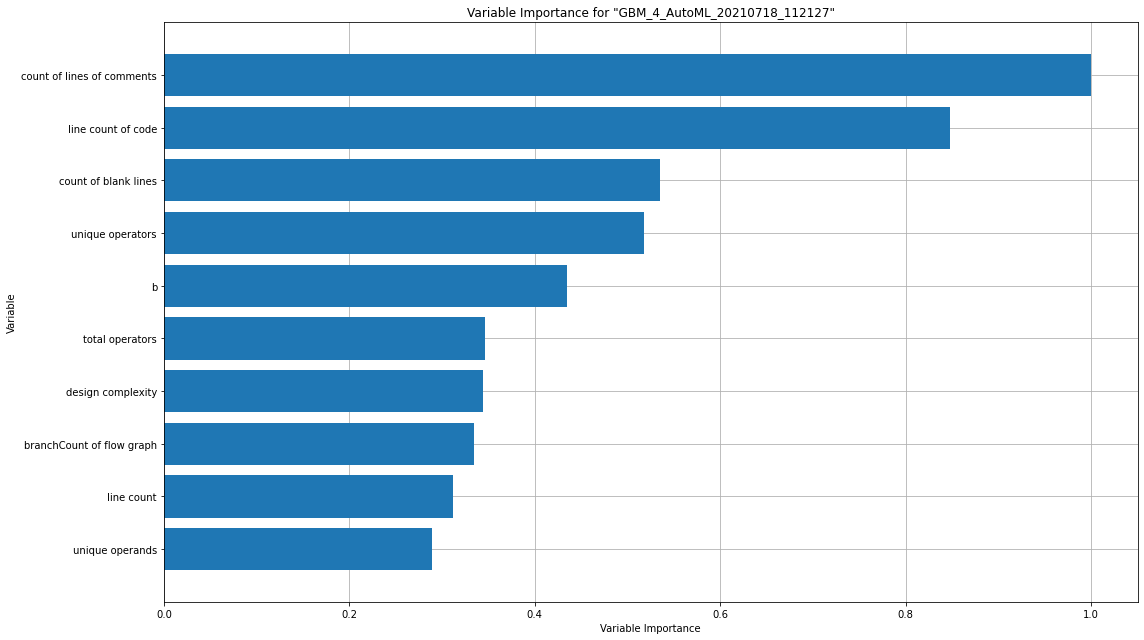

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

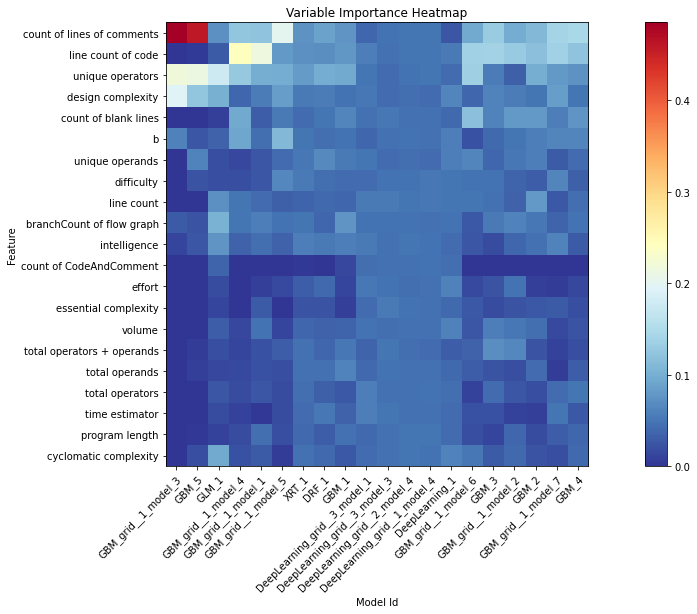

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

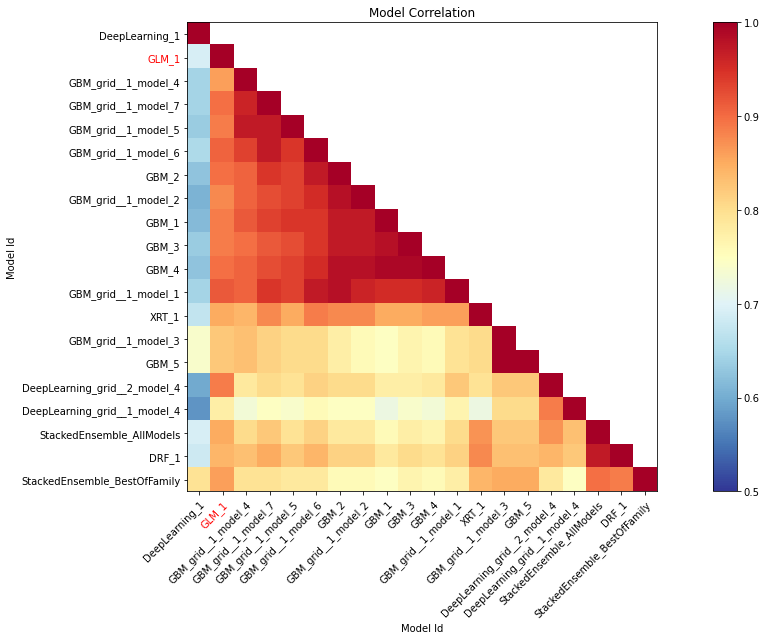

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

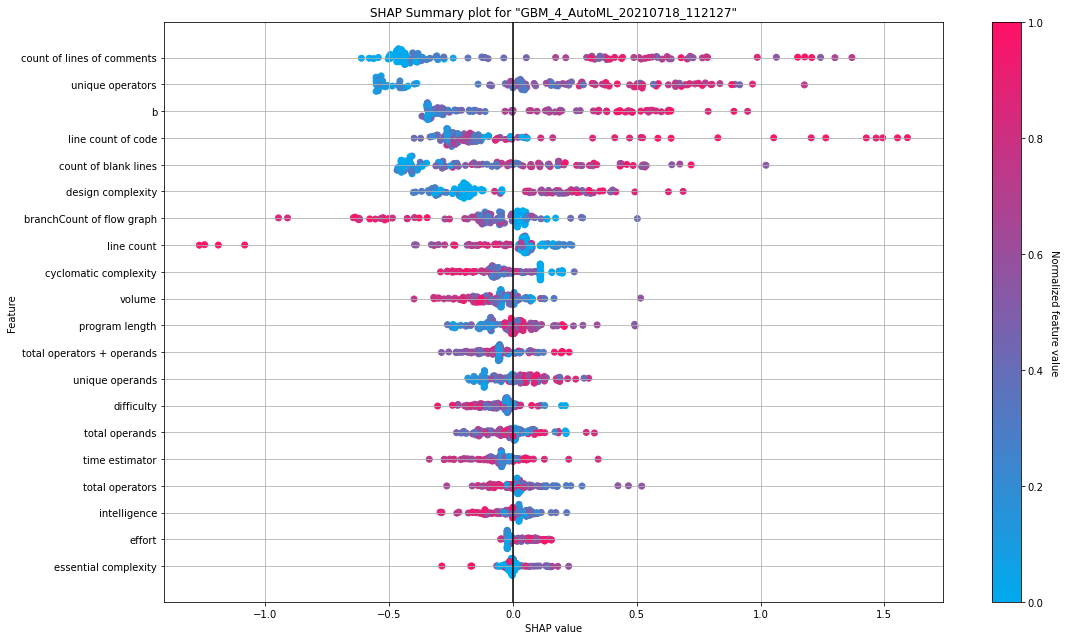

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

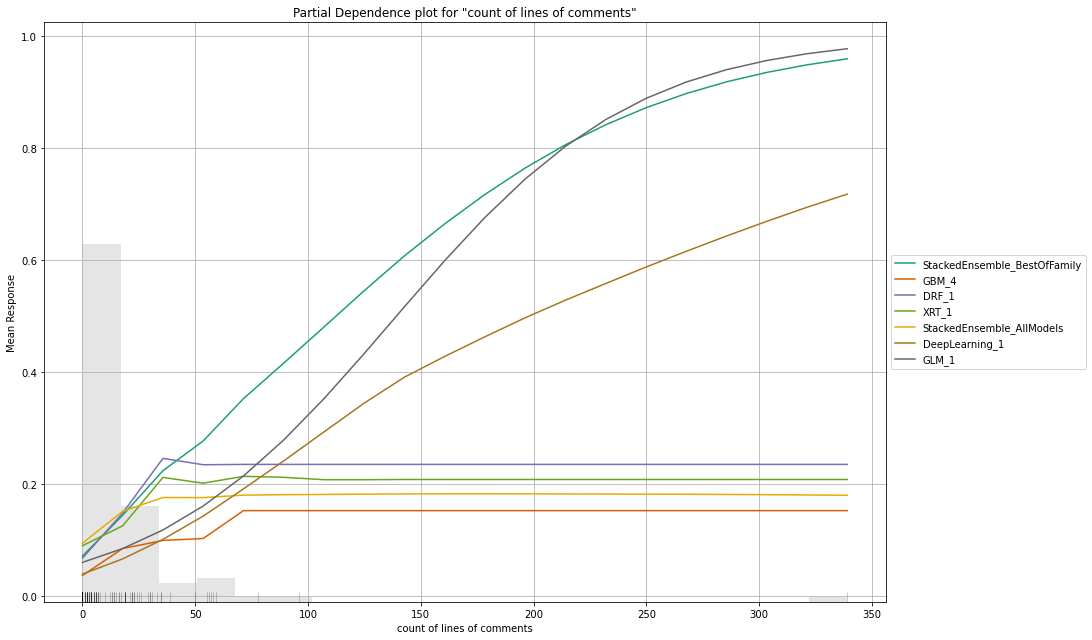

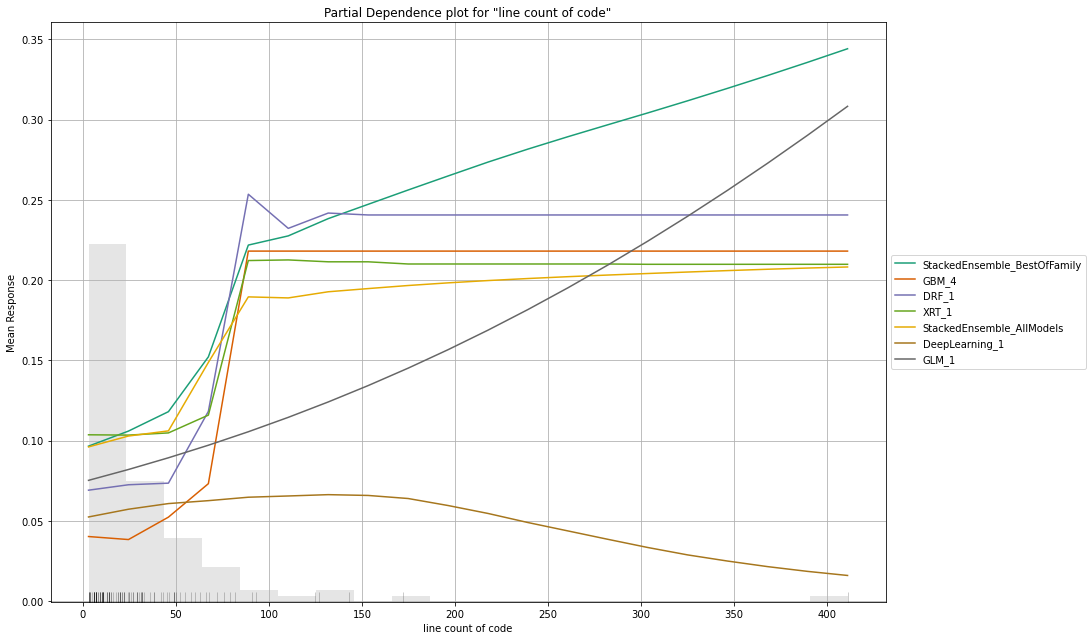

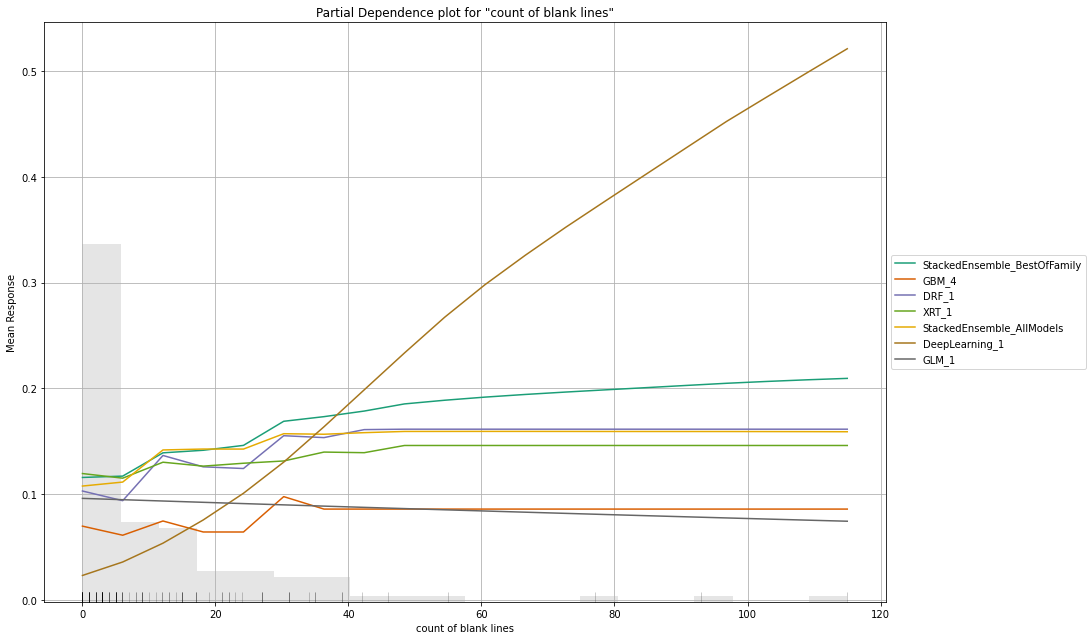

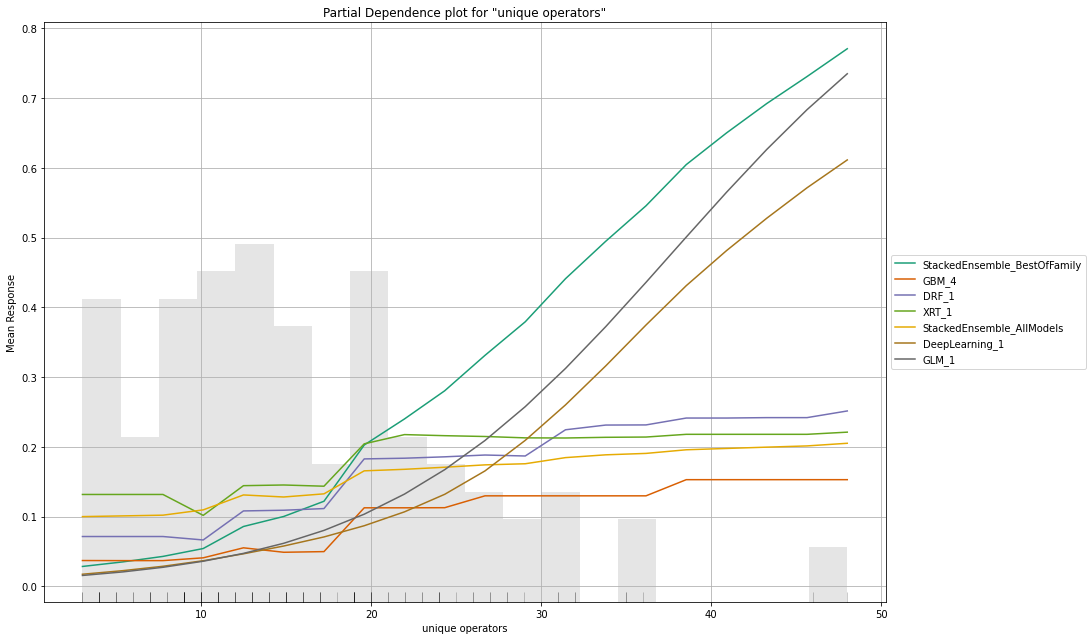

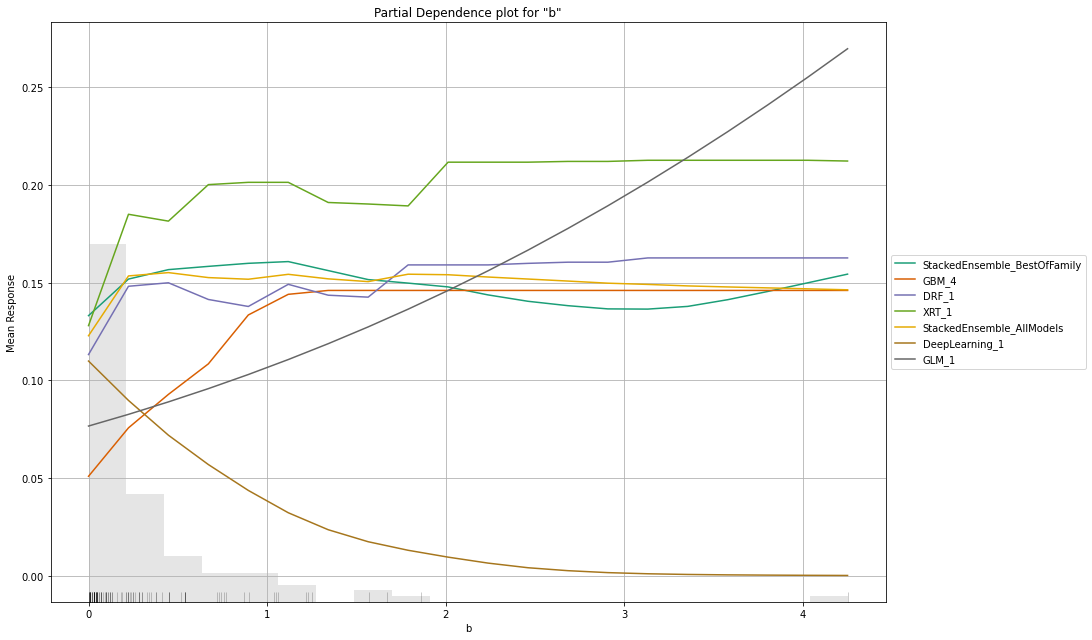

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_BestOfFamily_AutoML_20210718_112127


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2696442531121929: 


false  true   Error           Rate
0  false  343.0  15.0  0.0419   (15.0/358.0)
1   true    0.0  33.0     0.0     (0.0/33.0)
2  Total  343.0  48.0  0.0384   (15.0/391.0)

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

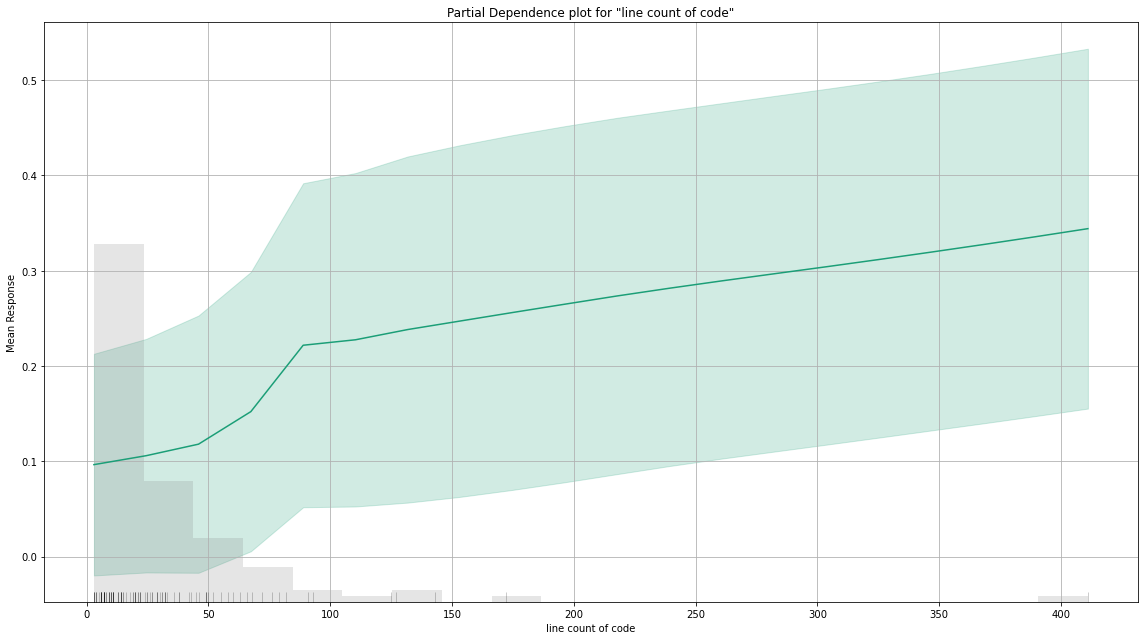

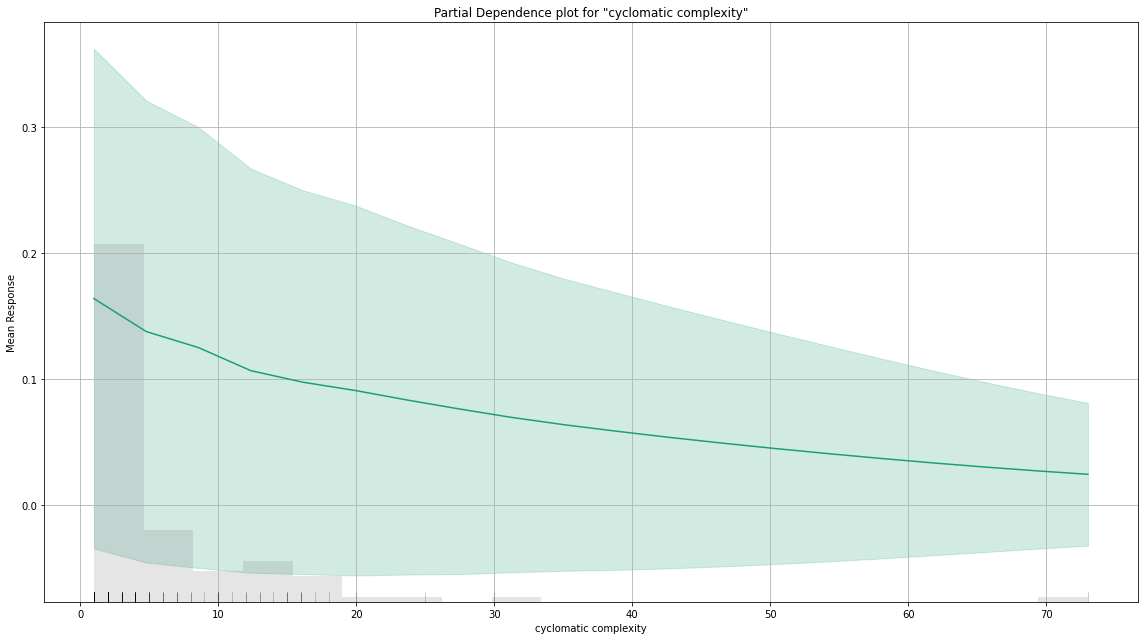

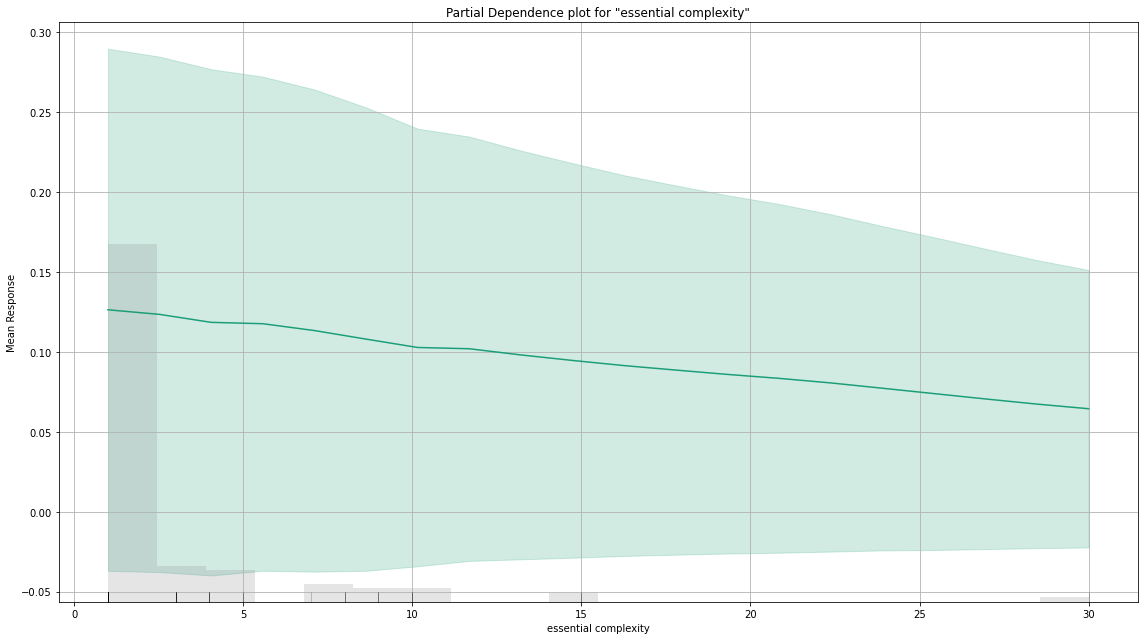

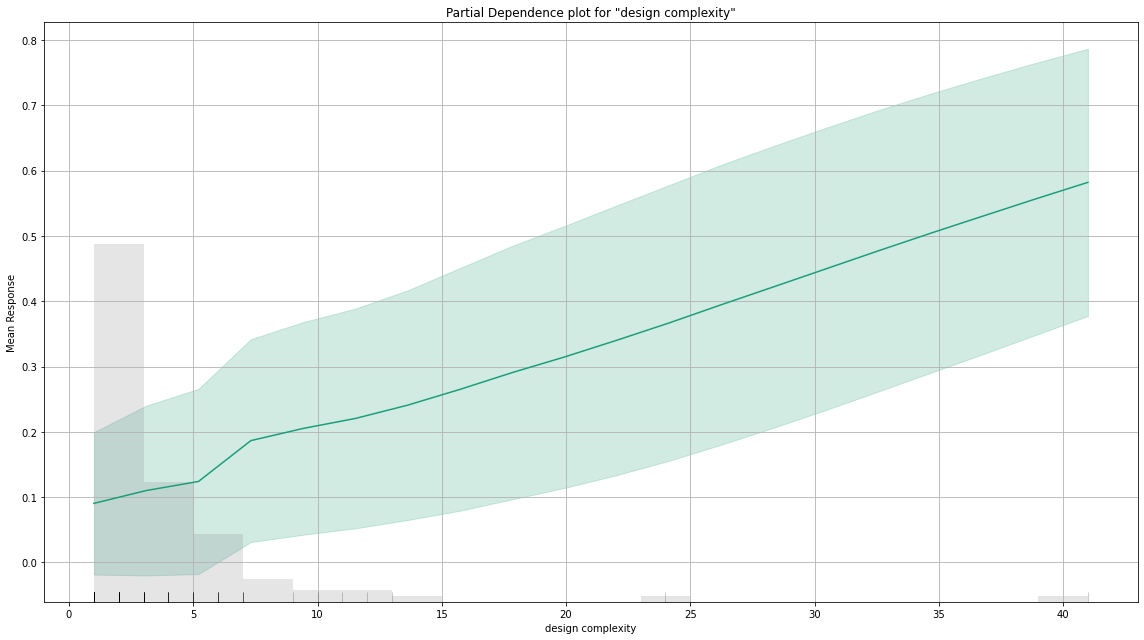

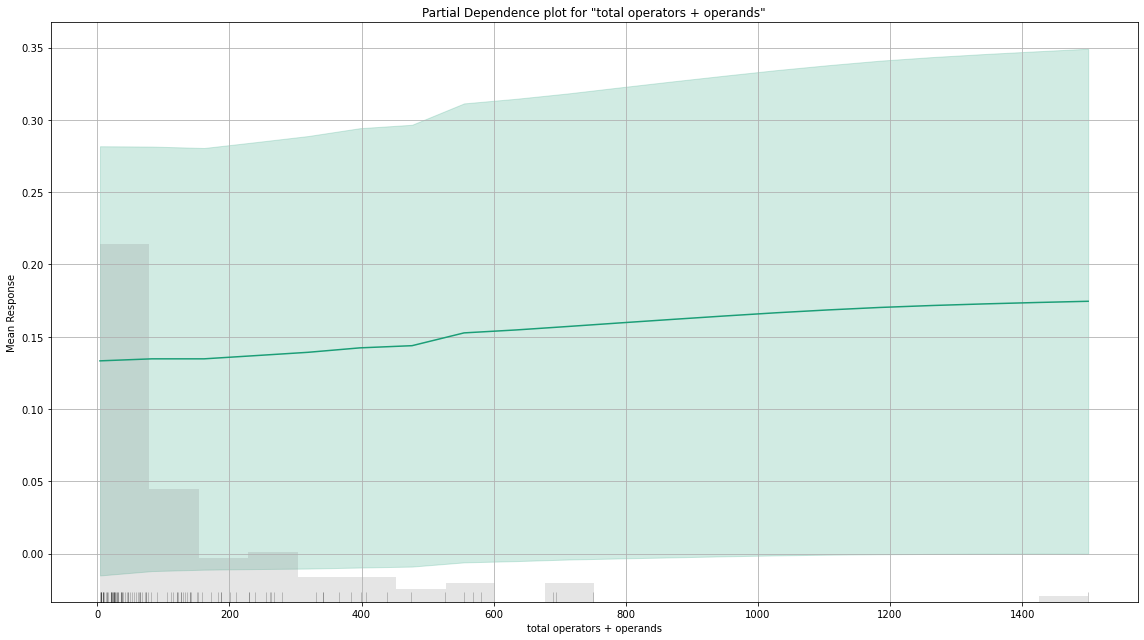

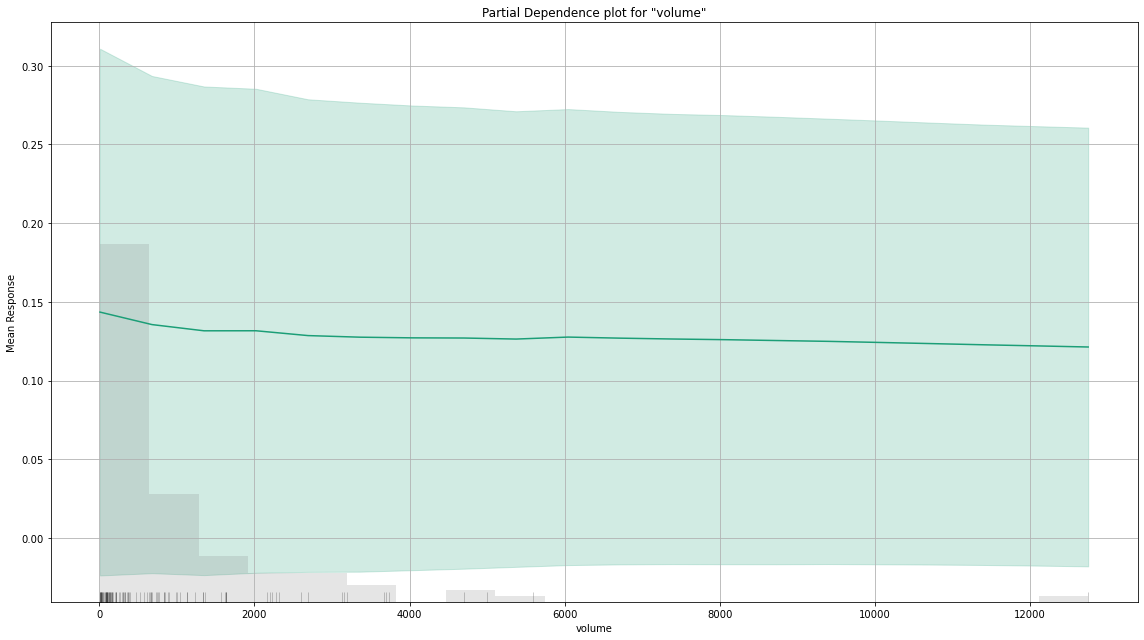

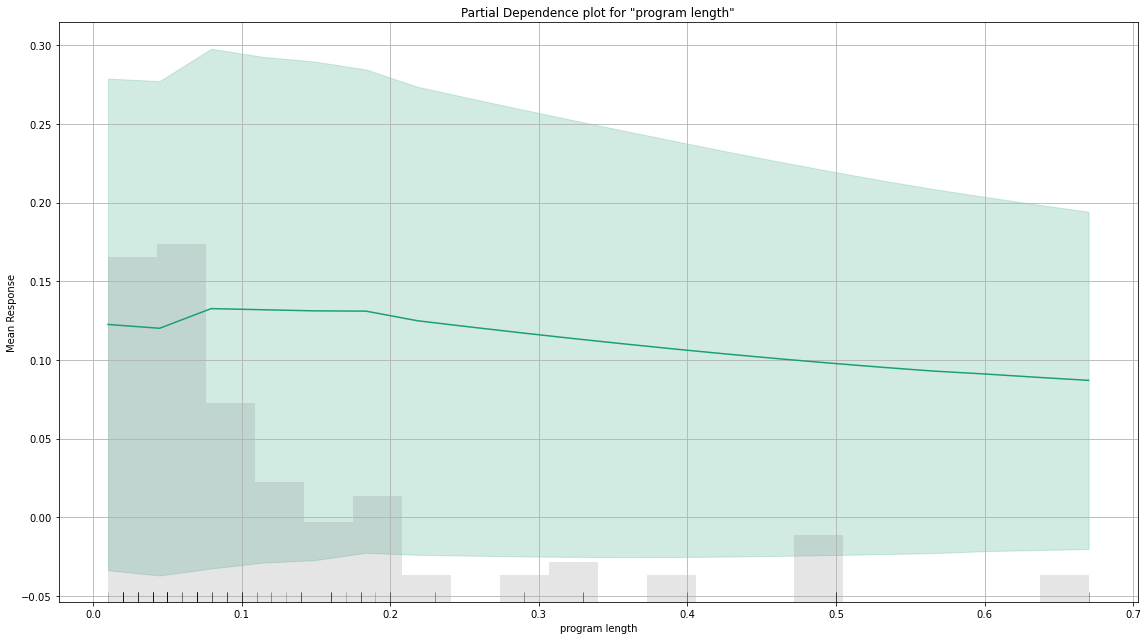

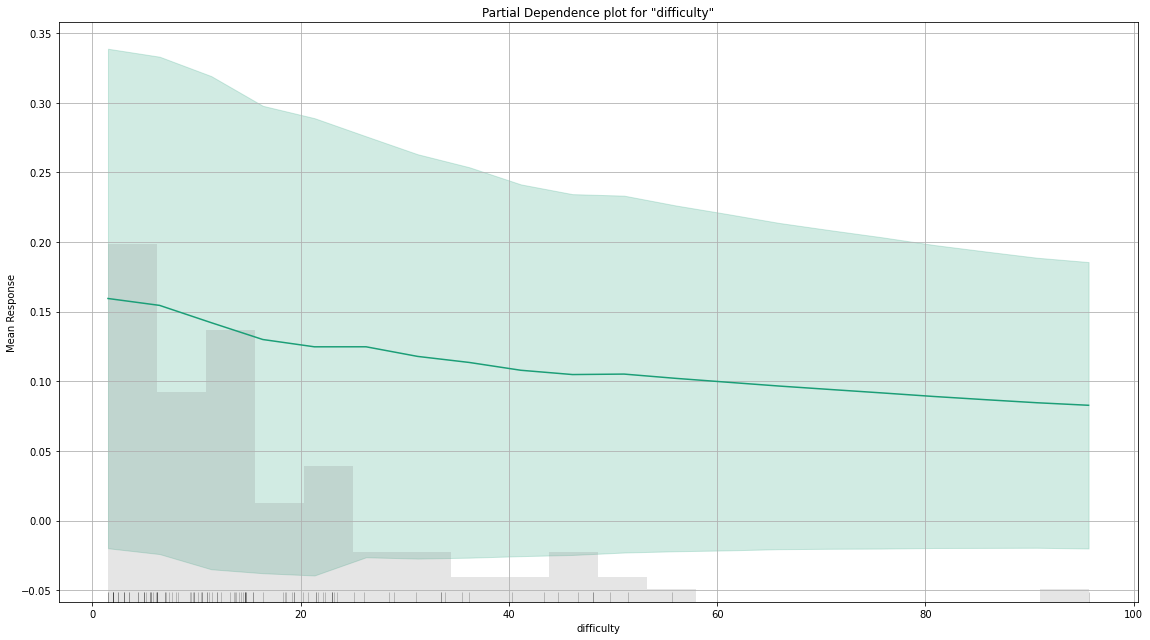

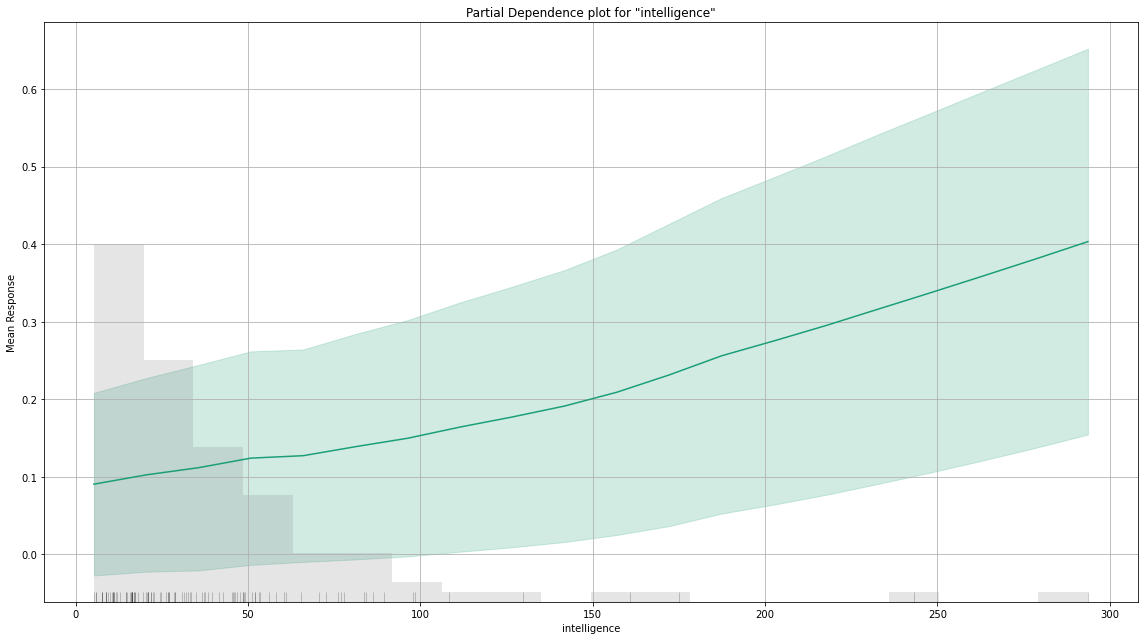

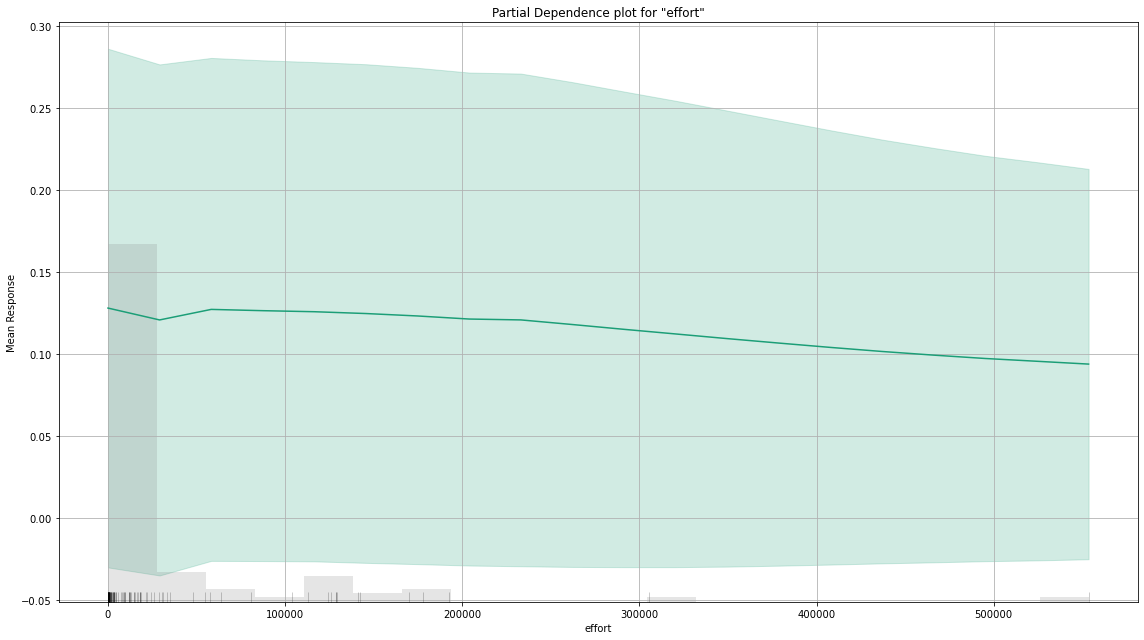

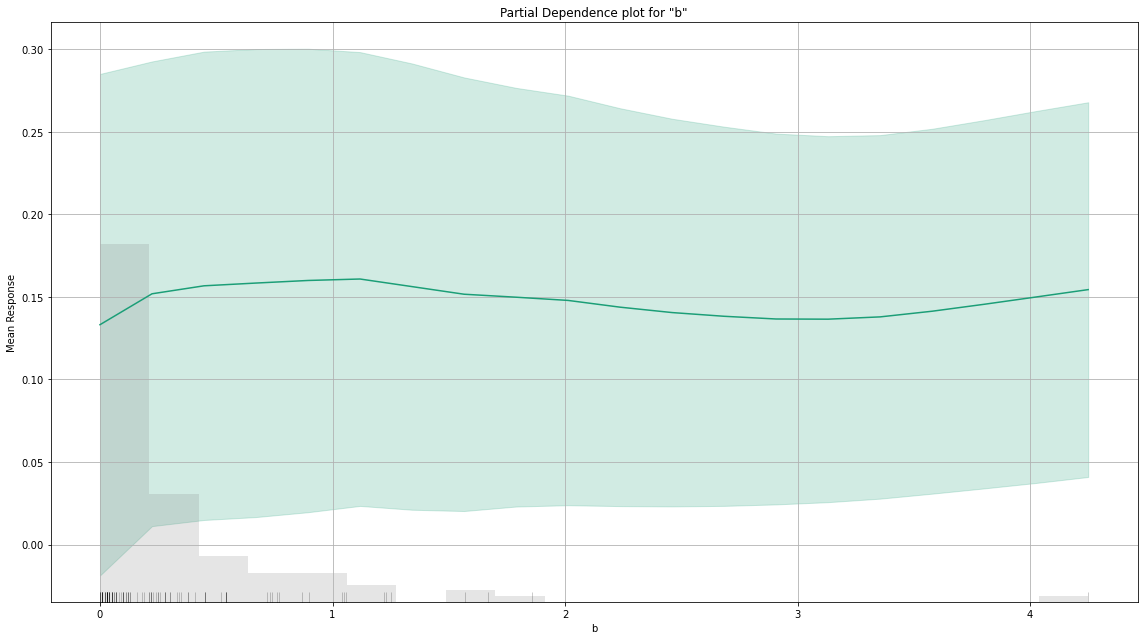

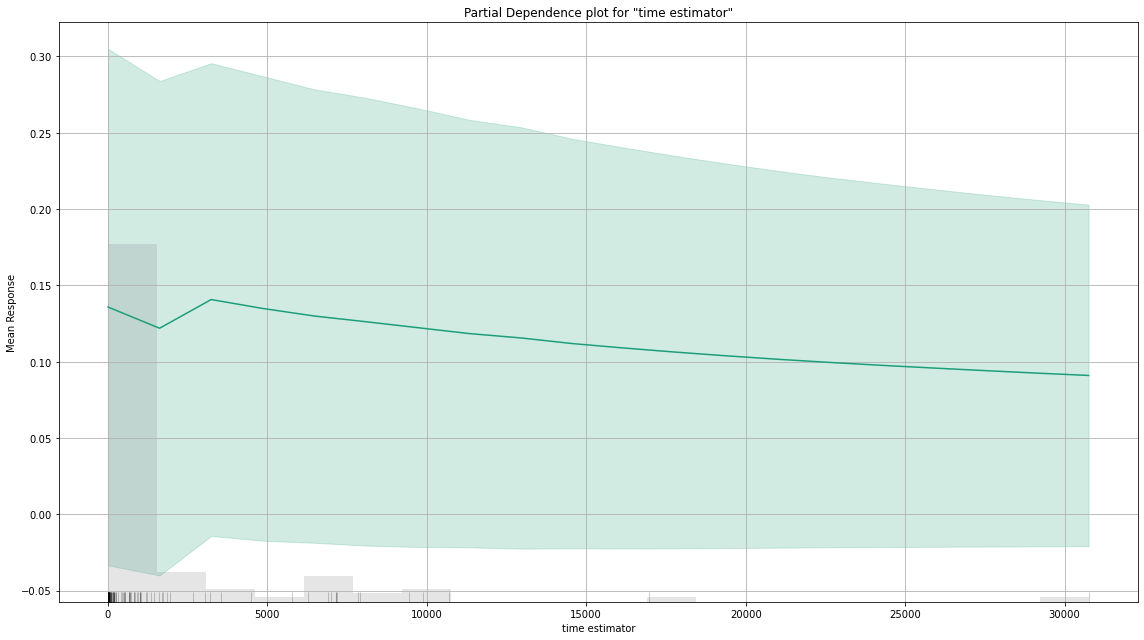

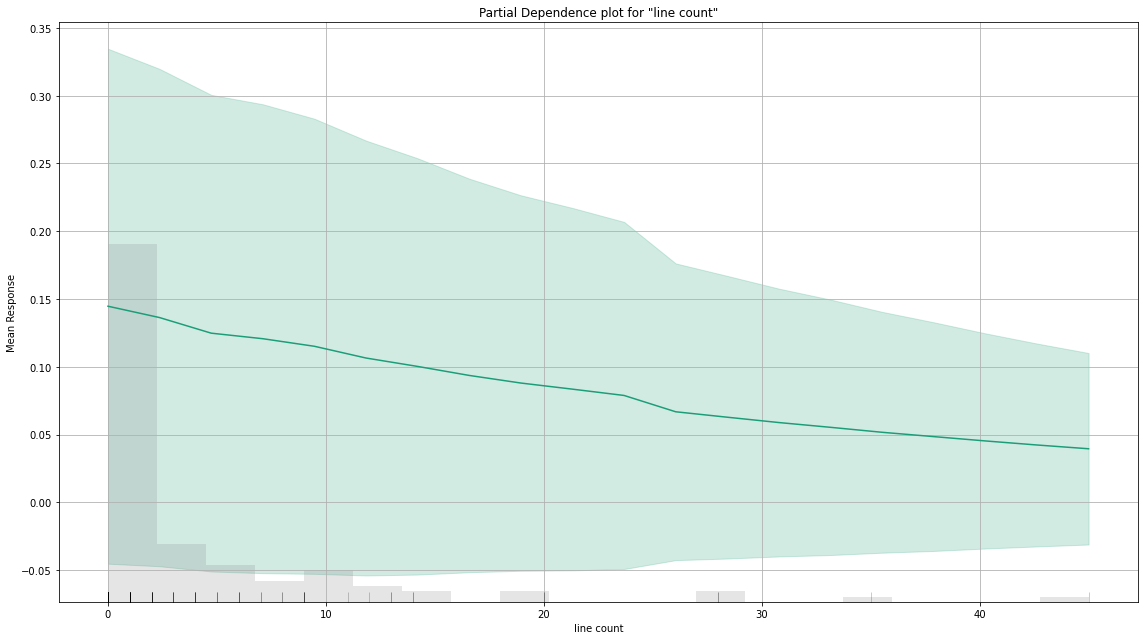

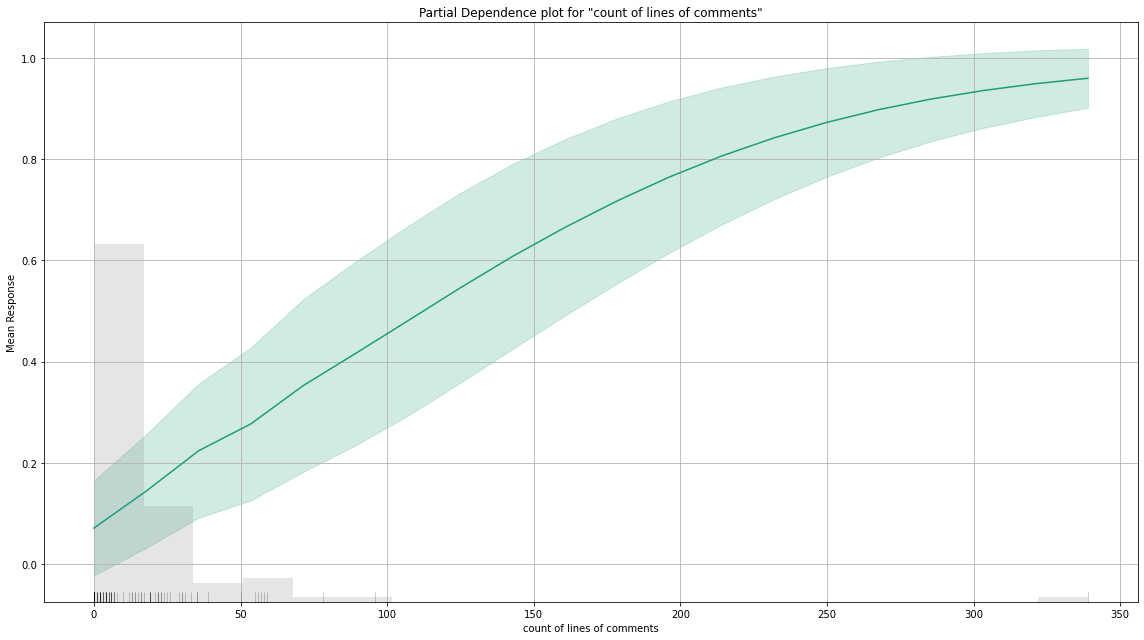

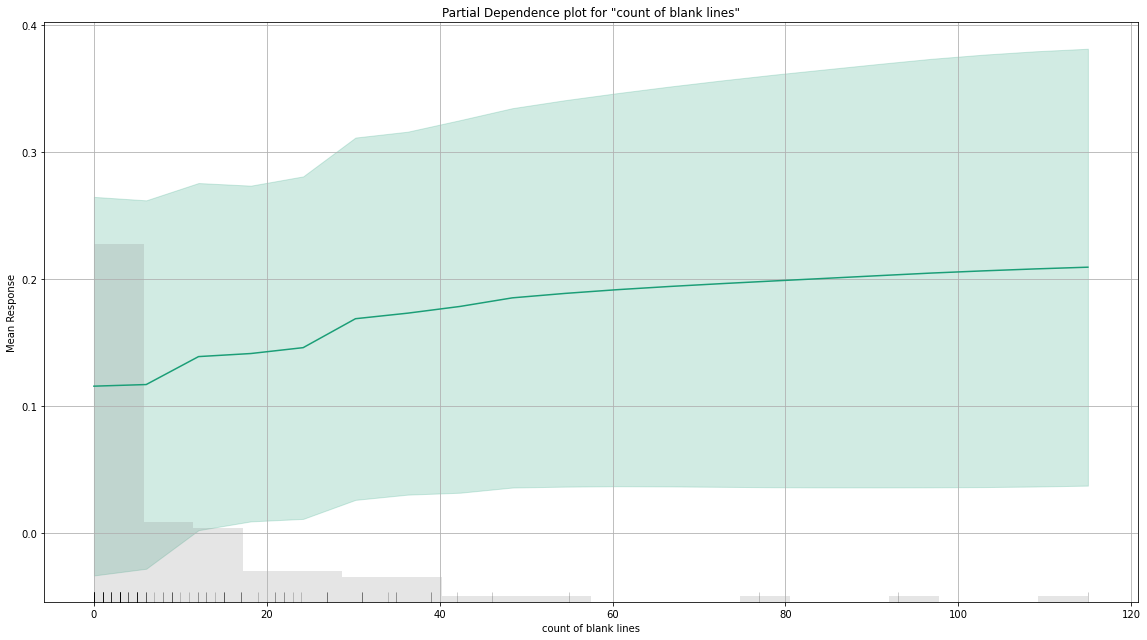

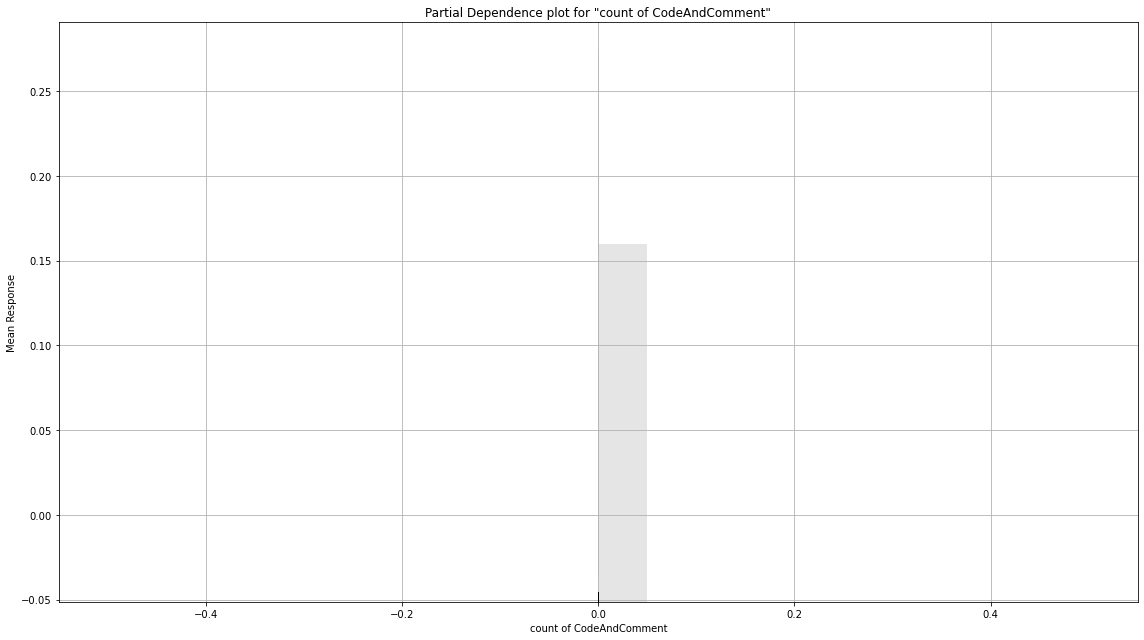

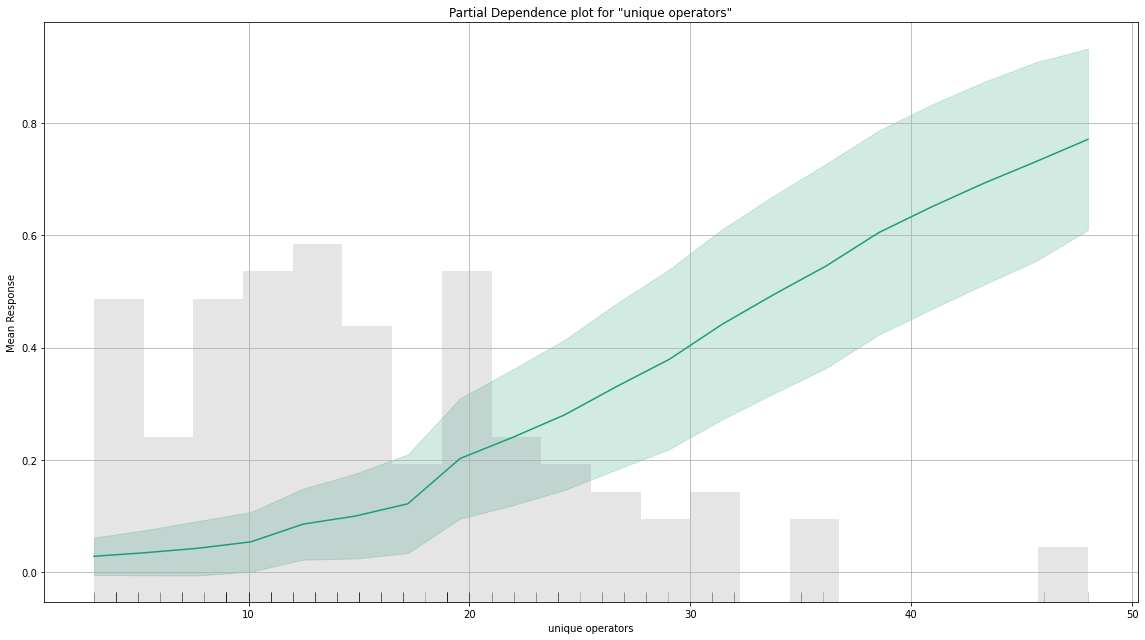

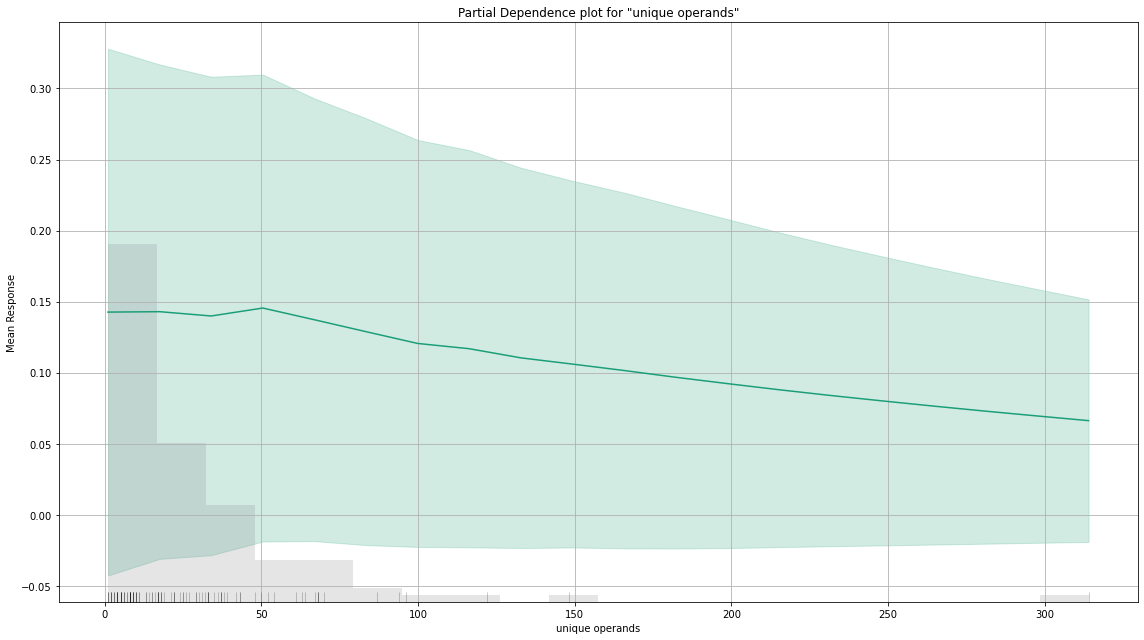

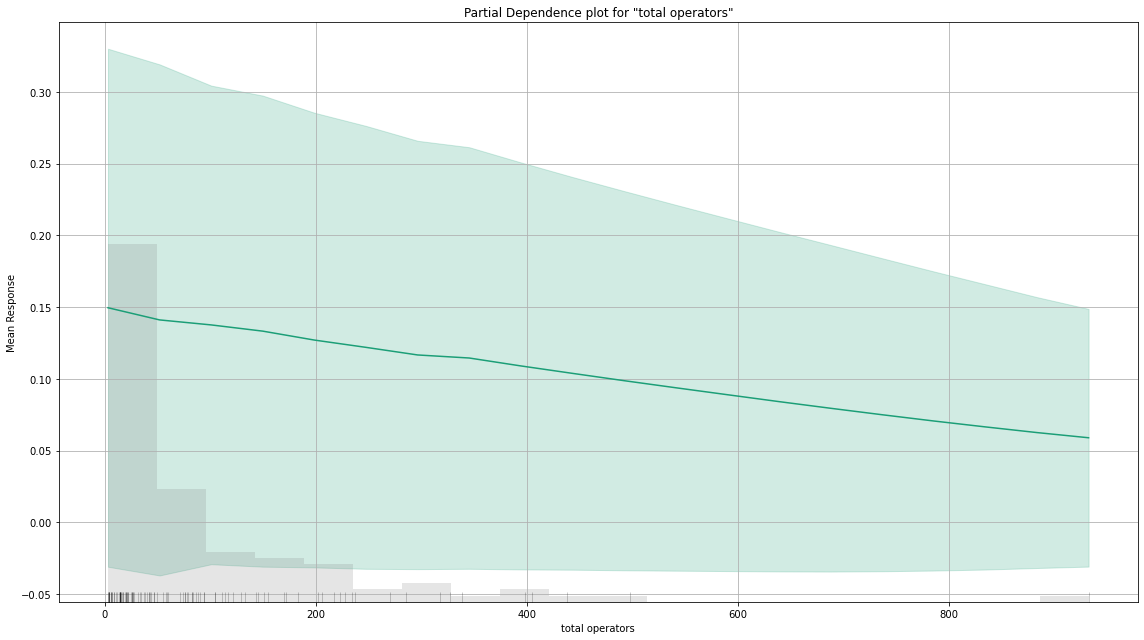

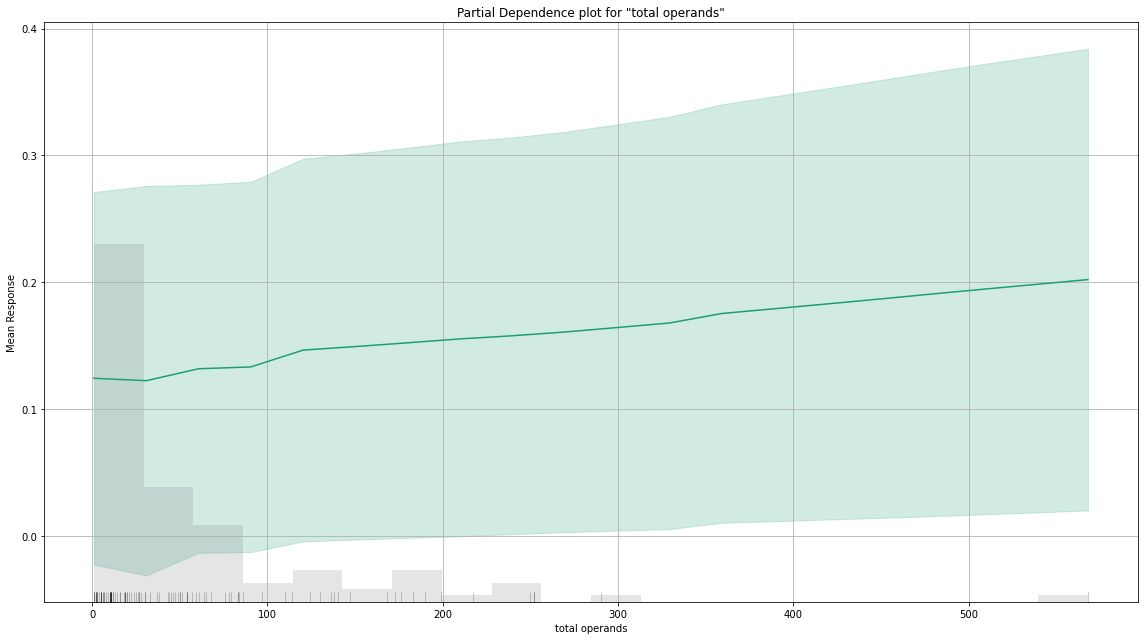

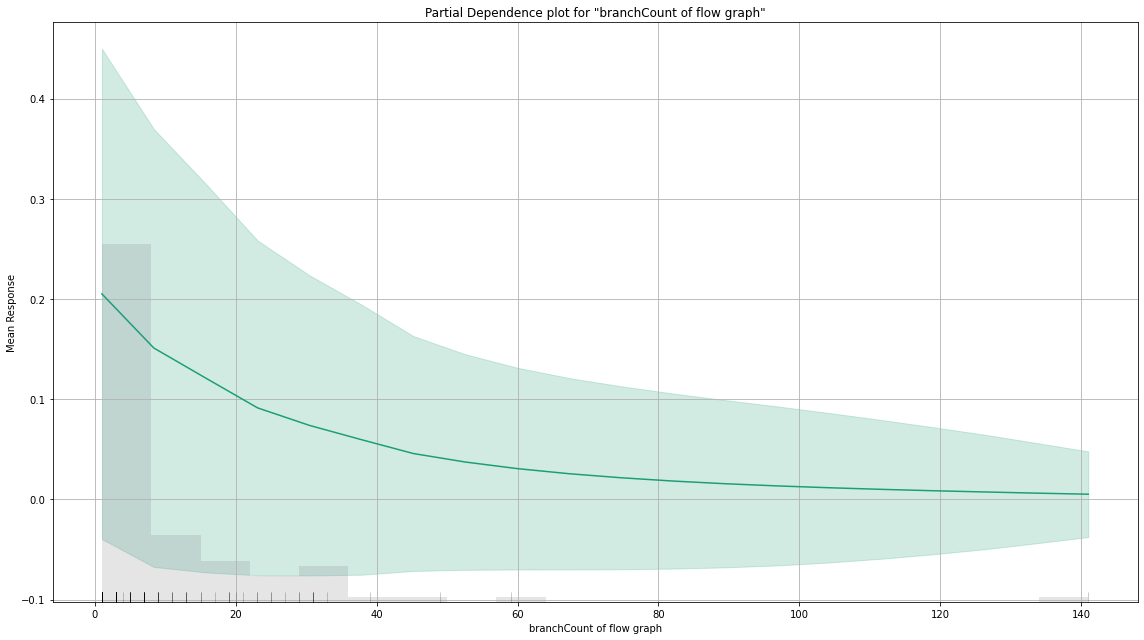

In [14]:
import h2o
from h2o.automl import H2OAutoML

h2o.init()

# Import wine quality dataset
f = "bug_pred.csv"
df = h2o.import_file(f)

# Reponse column
y = "defects"

# Split into train & test
splits = df.split_frame(ratios = [0.8], seed = 1)
train = splits[0]
test = splits[1]

# Run AutoML for 1 minute
aml = H2OAutoML(max_runtime_secs=60, seed=1)
aml.train(y=y, training_frame=train)

# Explain leader model & compare with all AutoML models
exa = aml.explain(test)

# Explain a single H2O model (e.g. leader model from AutoML)
exm = aml.leader.explain(test)

# Explain a generic list of models
# use h2o.explain as follows:
# exl = h2o.explain(model_list, test)

#       1. loc             : numeric % McCabe's line count of code
#       2. v(g)            : numeric % McCabe "cyclomatic complexity"
#       3. ev(g)           : numeric % McCabe "essential complexity"
#       4. iv(g)           : numeric % McCabe "design complexity"
#       5. n               : numeric % Halstead total operators + operands
#       6. v               : numeric % Halstead "volume"
#       7. l               : numeric % Halstead "program length"
#       8. d               : numeric % Halstead "difficulty"
#       9. i               : numeric % Halstead "intelligence"
#      10. e               : numeric % Halstead "effort"
#      11. b               : numeric % Halstead 
#      12. t               : numeric % Halstead's time estimator
#      13. lOCode          : numeric % Halstead's line count
#      14. lOComment       : numeric % Halstead's count of lines of comments
#      15. lOBlank         : numeric % Halstead's count of blank lines
#      16. lOCodeAndComment: numeric
#      17. uniq_Op         : numeric % unique operators
#      18. uniq_Opnd       : numeric % unique operands
#      19. total_Op        : numeric % total operators
#      20. total_Opnd      : numeric % total operands
#      21: branchCount     : numeric % of the flow graph
#      22. defects         : {false,true} % module has/has not one or more 
#                                         % reported defects


### NOVELTY 

In [15]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(novelty = True)
lof.fit(X_train)

LocalOutlierFactor(novelty=True)